<a href="https://colab.research.google.com/github/MDTanveerAlam1/ExcelR/blob/main/Basic_Statistics_Assignments_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descriptive Analytics for Numerical Columns ->**

**Objective:** To compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
# Steps 1: Load the dataset

import pandas as pd
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [2]:
# Step 2: Identify Numerical Columns

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [3]:
# Step 3: Calculate Statistical Measures

for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()

    print(f"{col}:")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Mode: {mode}")
    print(f"  Standard Deviation: {std_dev}\n")


Volume:
  Mean: 5.066666666666666
  Median: 4.0
  Mode: 3
  Standard Deviation: 4.231602391213926

Avg Price:
  Mean: 10453.433333333332
  Median: 1450.0
  Mode: 400
  Standard Deviation: 18079.90483993645

Total Sales Value:
  Mean: 33812.83555555555
  Median: 5700.0
  Mode: 24300
  Standard Deviation: 50535.07417255328

Discount Rate (%):
  Mean: 15.155241895330914
  Median: 16.57776564929597
  Mode: 5.007822189204133
  Standard Deviation: 4.220602153325511

Discount Amount:
  Mean: 3346.499424342415
  Median: 988.9337332382784
  Mode: 69.17794228822787
  Standard Deviation: 4509.9029633539985

Net Sales Value:
  Mean: 30466.336131270138
  Median: 4677.788059301853
  Mode: 326.97480055470817
  Standard Deviation: 46358.656624066934



**Data Visualization**

**Objective:** Visualize the distribution and relationship of numerical and categorical variables in the dataset.

*Histograms :*
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences


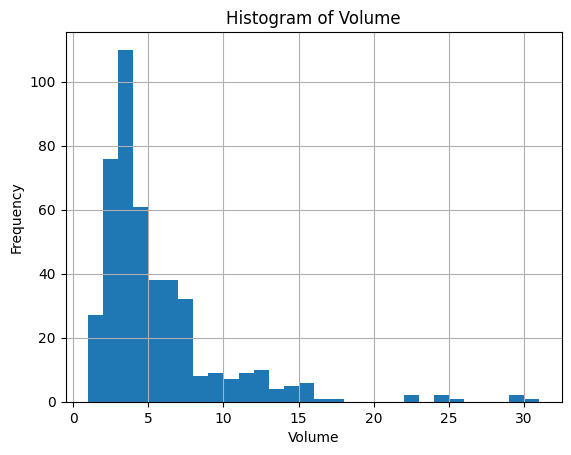

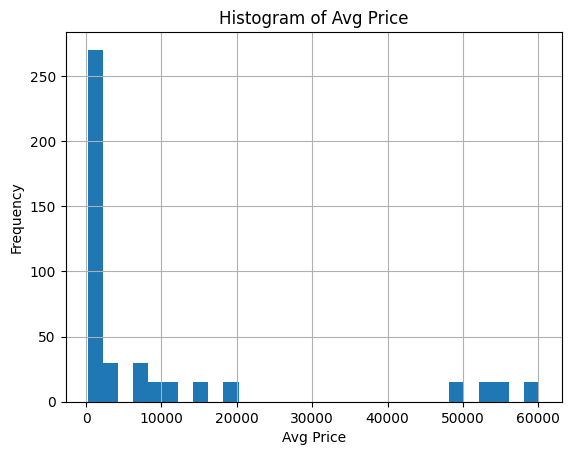

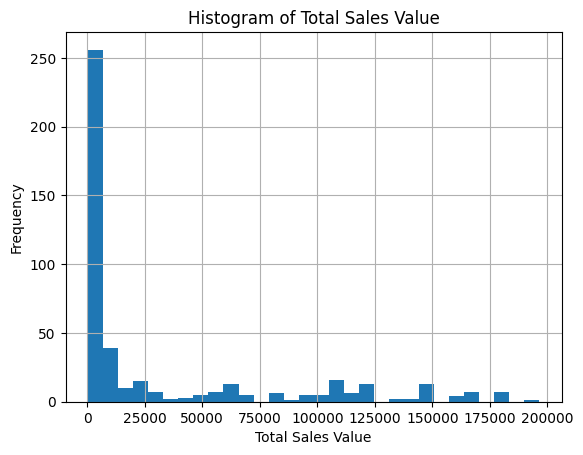

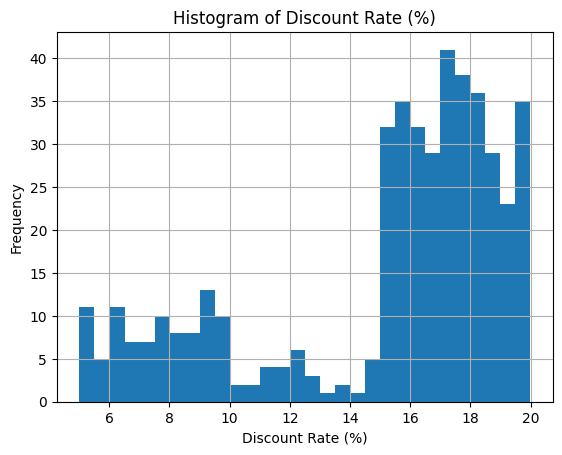

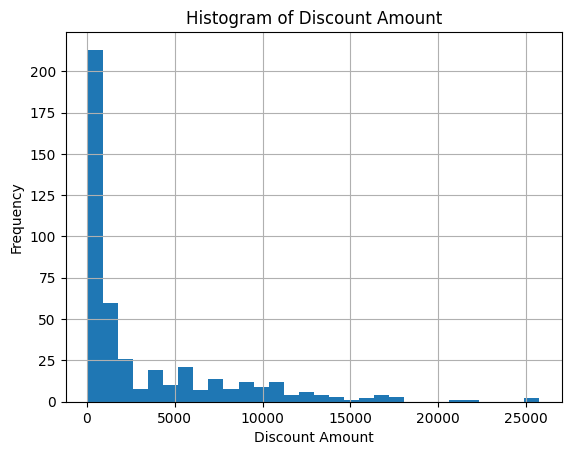

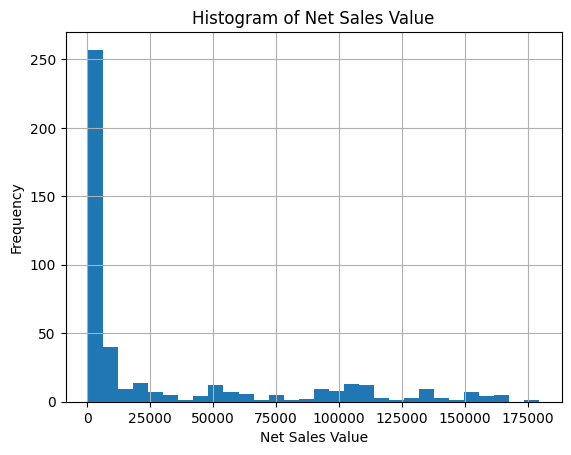

In [4]:
import matplotlib.pyplot as plt

for col in numerical_columns:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

*Boxplots :*
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.


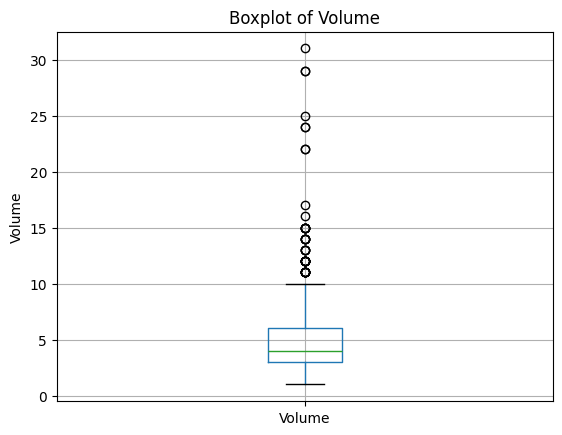

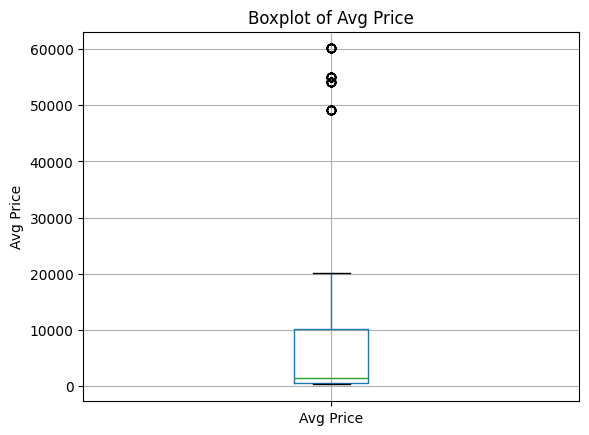

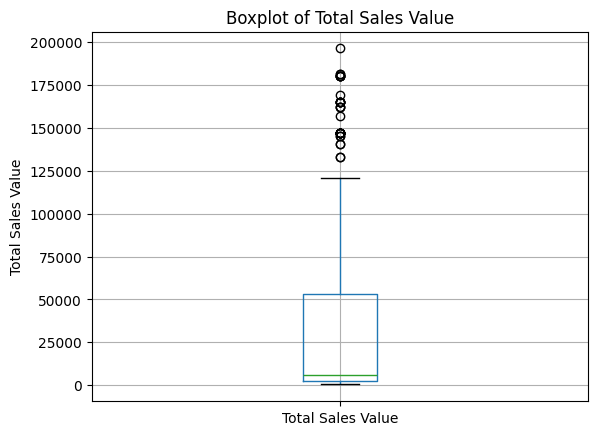

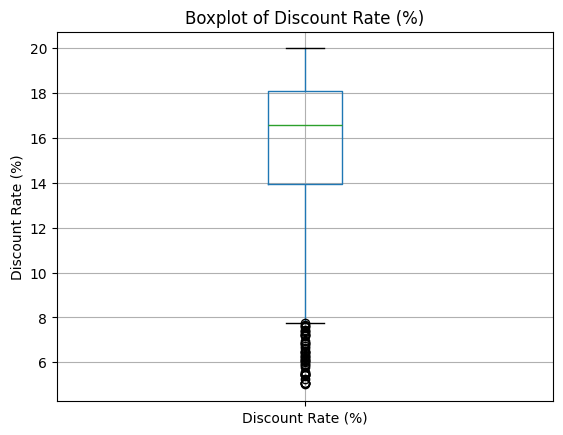

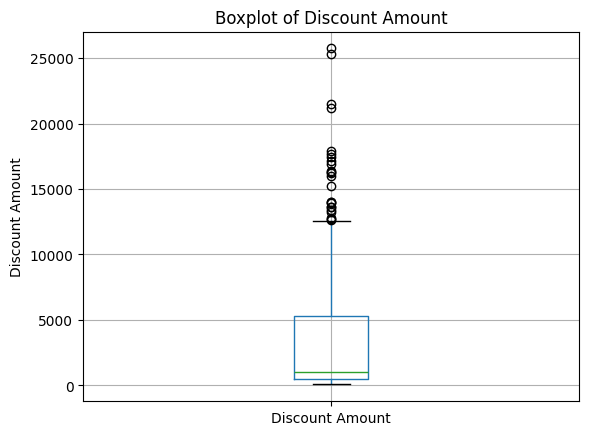

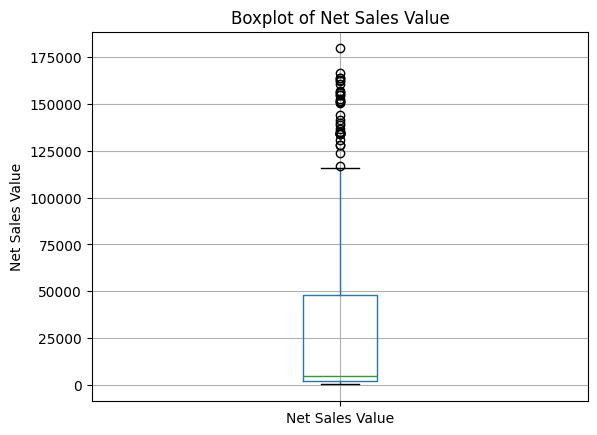

In [5]:
for col in numerical_columns:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

*Bar Chart Analysis for Categorical Column : *
	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.


Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


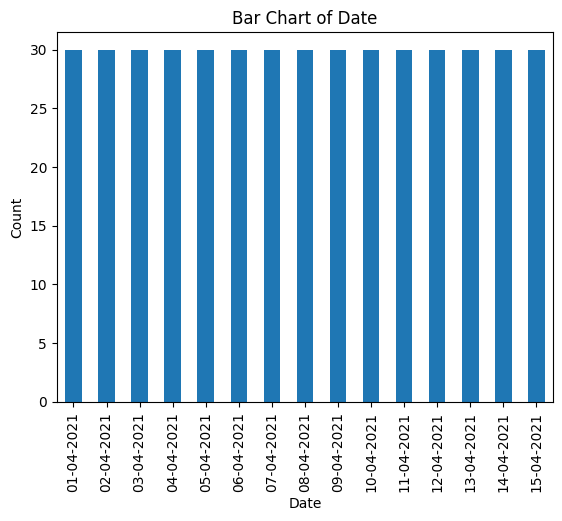

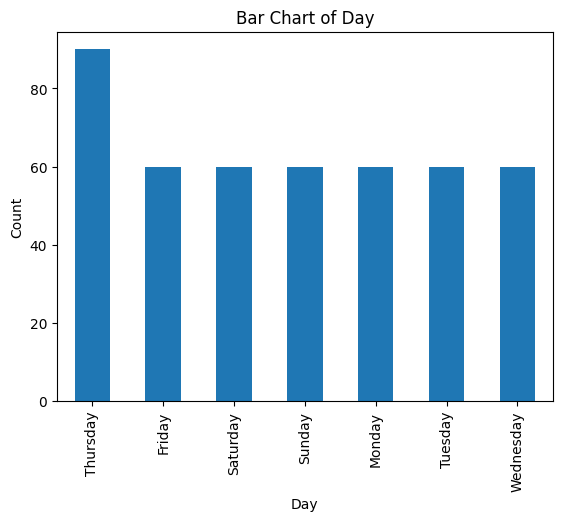

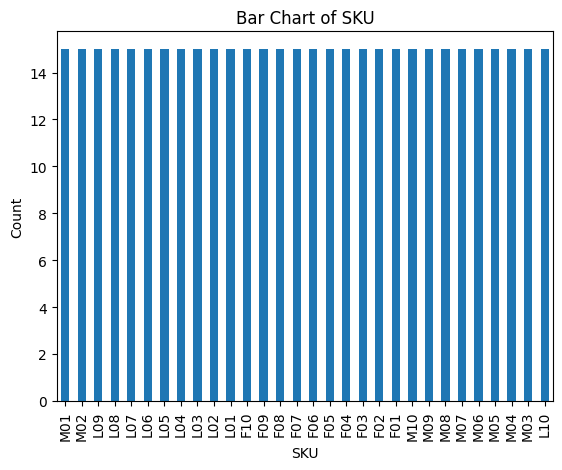

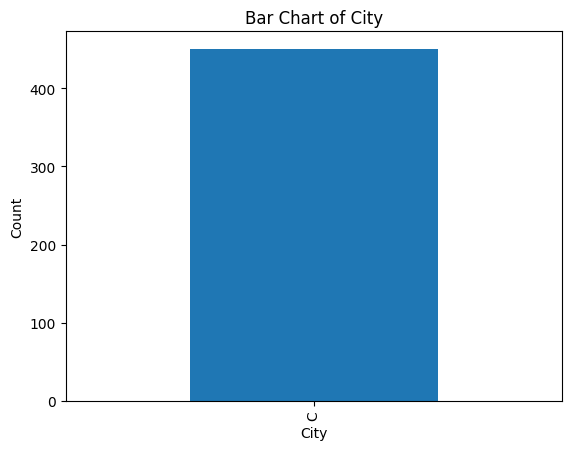

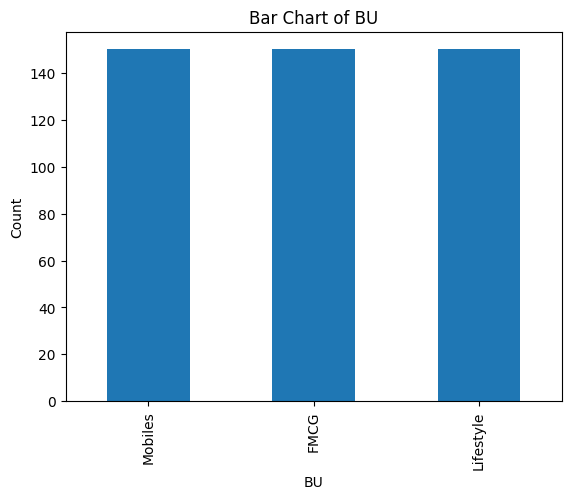

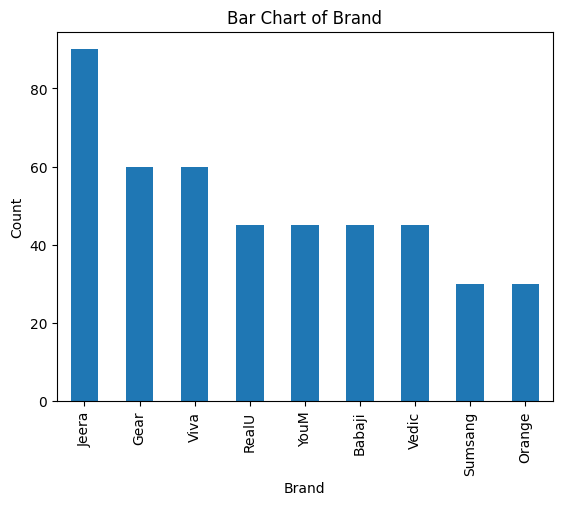

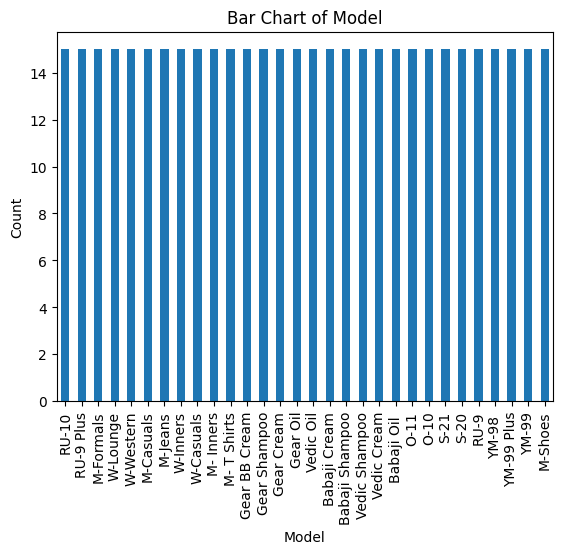

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Plot bar charts for categorical columns
for col in categorical_columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [7]:
#==============================================================================

**Standardization of Numerical Variables**

**Objective :** Scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

**Explaination the Concept of Standardization (Z-Score Normalization):**

Standardization is a method to transform data such that it has a mean (μ) of 0 and a standard deviation (σ) of 1. This process is also known as Z-score normalization.

The formula for standardization is:

     z = (x-μ)/σ
    
  x is the original data point

  μ is the mean of the dataset
  
  σ is the standard deviation of the dataset

In [8]:
# Step 2 :

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Show before and after comparisons of the data distributions
print("Standardized Numerical Columns:")
print(df[numerical_columns].head())


Standardized Numerical Columns:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


In [9]:
#===============================================================================

**Conversion of Categorical Data into Dummy Variables**

**Objective : ** transform categorical variables into a format that can be provided to ML algorithms

In [10]:
# Step 1: Discuss the Need

# One-hot encoding converts categorical variables into a format suitable for machine learning algorithms by creating binary columns for each category.

# Step 2 : Apply One-Hot Encoding

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
print(df.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0          

In [11]:
#============================================================================

**Conclusion**

**Key Findings**

*Descriptive Analytics:*

Calculated mean, median, mode, and standard deviation for numerical columns, providing insights into the central tendency and variability.


*Data Visualization:*

Histograms and boxplots revealed the distribution, skewness, and presence of outliers. Bar charts for categorical columns illustrated the frequency of each category.


*Standardization:*

Improved the dataset's suitability for analytical models by standardizing numerical columns.


*One-Hot Encoding:*

Transformed categorical variables into binary columns, making the dataset ready for machine learning algorithms.

**Importance of Data Preprocessing**


*Standardization:*

Ensures that numerical variables are on a similar scale, improving model performance.

*One-Hot Encoding:*

Converts categorical data into a machine-learning-friendly format, allowing algorithms to process categorical variables effectively.


**ThankYou Sir/mam**